In [1]:
import sys
import os
import csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import taichi as ti
ti.init(arch=ti.cpu, random_seed=42)

[Taichi] version 1.4.0, llvm 15.0.4, commit fbe92fd8, linux, python 3.10.9
[I 01/29/23 06:44:30.883 20031] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
[Taichi] Starting on arch=x64


In [4]:
from ising_2d import spin_config, monte_carlo_dynamics

In [5]:
def mc_sample(lx, ly, k, h=0) :
    ising_field = spin_config.IsingField(lx, ly)
    ising_field.field_init()
    mc_obj = monte_carlo_dynamics.MonteCarloDynamics(ising_field)

    mag_temp0 = 200000.0
    for iter_time in range(ly * lx):
        mc_obj.dynamics(k=k, h=h)
        if iter_time % 10 == 0:
            mag_temp1 = ising_field.mag_py()
            if abs(mag_temp0 - mag_temp1) < 0.001:
                break
            else:
                mag_temp0 = mag_temp1

    ising_field.off_set()
    return ising_field.spin_img.to_numpy()

In [6]:
def proxy_loss(spin_glass) :
    dx = np.roll(spin_glass, 1, 0)-spin_glass
    dy = np.roll(spin_glass, 1, 1)-spin_glass
    return (np.sum(dx**2 + dy**2))/2

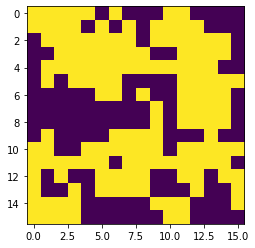

In [24]:
L = 16
sample = mc_sample(L, L, 0.3)
normalized_sample = sample / np.sqrt(np.sum(sample**2))
plt.imshow(normalized_sample)

In [8]:
data = []
means = []
kappas = np.linspace(0.05, 0.45, 10)
for k in kappas :
    print(k)
    num_samples = 50
    bucket = []
    for i in range(num_samples) :
        sample = mc_sample(L, L, k)
        normalized_sample = sample / np.sqrt(np.sum(sample**2))
        prxl   = proxy_loss(normalized_sample)
        bucket.append(prxl)
    data.append(bucket)
    means.append(np.mean(bucket))

0.05
0.09444444444444444
0.1388888888888889
0.18333333333333335
0.2277777777777778
0.27222222222222225
0.31666666666666665
0.3611111111111111
0.40555555555555556
0.45


In [9]:
stds = [np.std(bucket) for bucket in data]

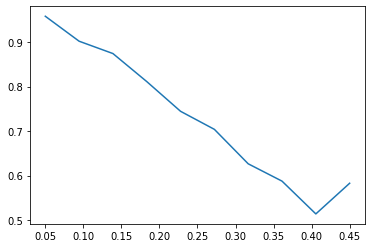

In [10]:
plt.plot(kappas, means)

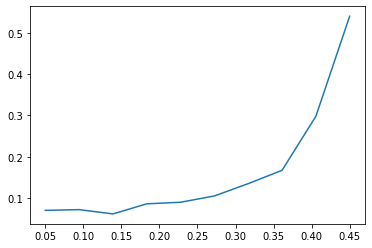

In [11]:
plt.plot(kappas, stds)

In [21]:
print({"kappas": kappas, "means": means})

{'kappas': array([0.05      , 0.09444444, 0.13888889, 0.18333333, 0.22777778,
       0.27222222, 0.31666667, 0.36111111, 0.40555556, 0.45      ]), 'means': [0.9581977105140687, 0.9020747089385986, 0.8743394351005555, 0.8113537323474884, 0.7445275354385376, 0.7039586758613586, 0.6265425270795822, 0.5875770354270935, 0.5138944089412689, 0.5828443007171153]}
